# Revision
I got a quite good result for this notebook (94%). As Neil suggested, I re-organized and re_wrote some of the sentence statements. <br>
For the challenge, I would appreciate if you can suggest more things to expand the model expect the Ridge and Lasso regressions that I have done. <br>
No Major changes overall. 

In [1]:
student_name = 'Tuan Dat Huynh'
student_ID = '43855326'

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

%matplotlib inline 


In [3]:
# Read data into a dataframe, display first few observations and data summary
wine_train =  pd.read_csv('wine_train.csv')
print(wine_train.head(5))
wine_train.describe()

   Year  LogPrice  WinterRain  Temperature  HarvestRain  TimeYears
0  1952  -0.99868         600      17.1167          160         31
1  1953  -0.45440         690      16.7333           80         30
2  1955  -0.80796         502      17.1500          130         28
3  1957  -1.50926         420      16.1333          110         26
4  1958  -1.71655         582      16.4167          187         25


,Year,LogPrice,WinterRain,Temperature,HarvestRain,TimeYears
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,1965.291667,-1.431440,598.708333,16.538196,152.62500,17.708333
std,7.416076,0.663845,130.887764,0.673993,73.12991,7.416076
min,1952.000000,-2.288790,376.000000,14.983300,38.00000,6.000000
25%,1959.750000,-2.018143,527.500000,16.224975,94.25000,11.750000
50%,1965.500000,-1.440950,591.000000,16.541650,142.50000,17.500000
75%,1971.250000,-0.975370,691.750000,17.079200,187.00000,23.250000
max,1977.000000,0.000000,830.000000,17.650000,292.00000,31.000000


Some points to note from the dataset summary:
- There are 24 observations in total
- There are no missing values for all observations.
- We will not use 'Year' variable in our models because it is only an index variable for the data set.
- Comparing min, max and median values for each variable, we can initially make a prediction that there is no outlier in this dataset (this prediction will be verified by the below box plots).

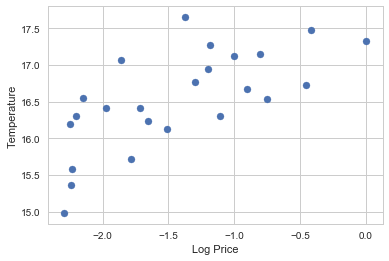

In [4]:
# Scatter plot for logPrice and temeprature
plt.scatter(wine_train['LogPrice'], wine_train['Temperature'])
plt.xlabel('Log Price')
plt.ylabel('Temperature')
plt.show()

There seems to be a quite strong positive linear relationship between Log Price of Wine and the Temperature. Refer to the below correlation matrix to determine the strength of this relationship.


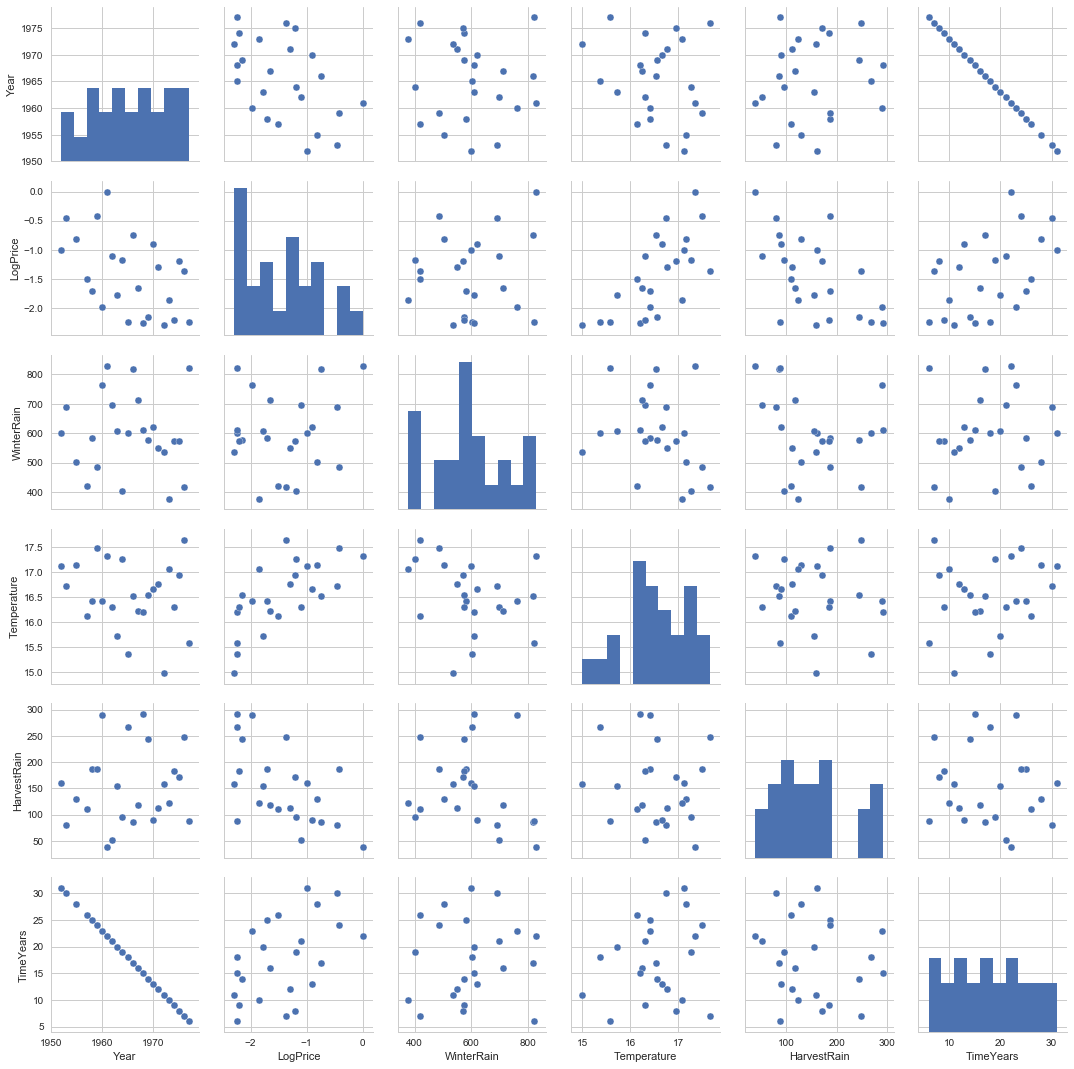

In [5]:
# Scatter plot matrix and histograms for all variables
variables = ['LogPrice', 'WinterRain', 'Temperature', 'HarvestRain', 'TimeYears']
sns.pairplot(wine_train)
plt.show()

LogPrice and Temperature are nearly Normally distributed, while the distributions of Harvest Rain, Winter Rain and Time Years are not obvious.

Looking at all scatter plots, it is necessary to normalize any of the variables as they do not have any special patterns.


Time Years seems to have a moderate positive linear relationship with Log Price. Additionally, Harvest Rain has a negative linear relationship with Log Price althought it is not extremely strong.

C:\Users\Johnny Huynh\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


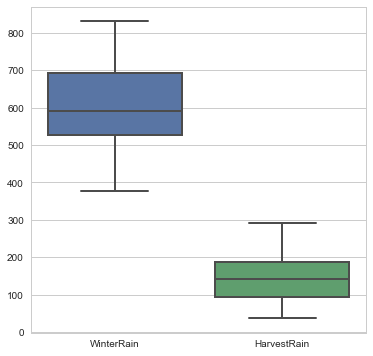

In [6]:
# Boxplot for Winter Rain and Harvest Rain
plt.figure(figsize=(6,6))
sns.boxplot(wine_train[['WinterRain', 'HarvestRain']])
plt.show()

There are no outliers with regards to Winter Rain and Harvest Rain. The ammount of Winter Rain varies much more than the amount of Harvest Rain.

C:\Users\Johnny Huynh\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


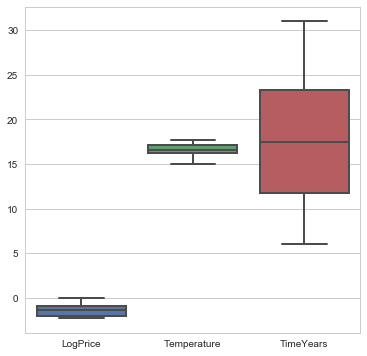

In [7]:
# Box plots for Log Price, Temperature and Time Years
# Boxplots for Winter Rain and Harvest Rain
plt.figure(figsize=(6,6))
sns.boxplot(wine_train[['LogPrice', 'Temperature', 'TimeYears']])
plt.show()

Similarly, there are no outliers with regards to LogPrice, Temperature and Time Years. LogPrice and Temperature seem to have very little variations.

In [27]:
# Correlation matrix
fig_heat = plt.figure(figsize=(8,6))
corr_matrix = wine_train.corr()
print(corr_matrix)
plt.show()




                 Year  LogPrice  WinterRain  Temperature  HarvestRain  \
Year         1.000000 -0.488085   -0.071217    -0.191228     0.130244   
LogPrice    -0.488085  1.000000    0.131420     0.683967    -0.575197   
WinterRain  -0.071217  0.131420    1.000000    -0.283231    -0.222786   
Temperature -0.191228  0.683967   -0.283231     1.000000    -0.130720   
HarvestRain  0.130244 -0.575197   -0.222786    -0.130720     1.000000   
TimeYears   -1.000000  0.488085    0.071217     0.191228    -0.130244   

             TimeYears  
Year         -1.000000  
LogPrice      0.488085  
WinterRain    0.071217  
Temperature   0.191228  
HarvestRain  -0.130244  
TimeYears     1.000000  


The Pearson correlation table is not so obivious to observe how variables are correlated. Let's generate a correlation heatmap from Seaborn library. In a correlation heat map, the deeper the color is, the more correlation between a pair of variables and vice versa, the lighter the less correlation.

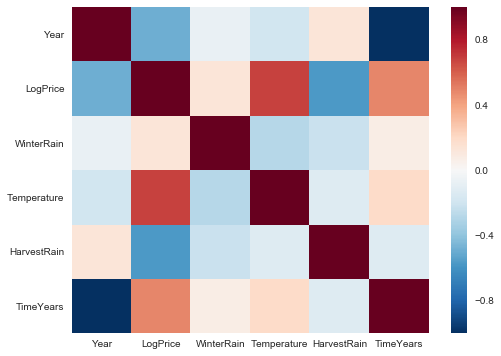

In [28]:
# Seaborn Correlation Heat map
fig_heat = plt.figure(figsize=(8,6))
corr_heatmap = sns.heatmap(corr_matrix)
plt.show(corr_heatmap)

As we can see, the most three deepest-coloured areas are the ones of Log Price and Harvest Rain (negative direction), Log Price and Temperature (positive direction) and Log Price and Time Years (postive directions). Double checking with the Pearson Correlation table, these pairs of variables have correlation coefficients of -0.575, 0.684 and 0.488, respectively. 

In [29]:
# Fit a linear regression of Temperature on logPrice using OLS method
x = wine_train['Temperature']
y = wine_train['LogPrice']
x = sm.add_constant(x)

lm1 = sm.OLS(y, x).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     19.34
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           0.000228
Time:                        23:03:09   Log-Likelihood:                -16.142
No. Observations:                  24   AIC:                             36.28
Df Residuals:                      22   BIC:                             38.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         -12.5727      2.536     -4.959      

- Using the OLS method, we have the regression model:
LogPrice = -12.57 + 0.6737 * Temperature 
- Both intercept and slope coefficients are highly significant (p-values << 0.01)
- The overall model is also highly significant - validated by p-value of F-statistic << 0.01 
- Temperature coefficient interpretation: With one unit increasing in temperature, log price will increase by 0.6737 unit in average, with other variables remain unchanged.
- BIC = 36.28 - the Bayesian Information Criterion is still high. The lower BIC, the better.
- R^2 = 0.468 - it is not too impressive while the model can only explain 46.8% variability of the Log Price around its mean. 


Now let's try adding further independent variables to the model. Those variables which are highly correlated with LogPrice (Pearson correlation coefficient > 0.3) will be selected i.e. TimeYears and HarvestRain 

In [10]:
# Fit a linear regression of Temperature and Time Years on logPrice using OLS method
x = wine_train[['Temperature', 'TimeYears']]
y = wine_train['LogPrice']
x = sm.add_constant(x)

lm2 = sm.OLS(y, x).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     15.77
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           6.58e-05
Time:                        22:56:32   Log-Likelihood:                -12.706
No. Observations:                  24   AIC:                             31.41
Df Residuals:                      21   BIC:                             34.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         -12.0054      2.259     -5.314      

All coefficients are highly significant with lower BIC: 34.95 compared to 38.64 of the original model.
R^2 increases from 0.468 to 0.6 (0.132 difference)

In [11]:
# Fit a linear regression of Temperature and Harvest Rain on logPrice using OLS method
x = wine_train[['Temperature', 'HarvestRain']]
y = wine_train['LogPrice']
x = sm.add_constant(x)

lm3 = sm.OLS(y, x).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     25.45
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           2.44e-06
Time:                        22:56:32   Log-Likelihood:                -8.9428
No. Observations:                  24   AIC:                             23.89
Df Residuals:                      21   BIC:                             27.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         -10.8356      1.968     -5.507      

All coefficients are highly significant with lower BIC: 27.42 compared to 38.64 of the original model.
R^2 increases from 0.468 to 0.708 (0.24 difference)
Adding HarvestRain seems more effective than adding TimeYears.

In [12]:
# Fit a linear regression of Temperature and Harvest Rain on logPrice using OLS method
x = wine_train[['Temperature', 'HarvestRain', 'TimeYears']]
y = wine_train['LogPrice']
x = sm.add_constant(x)

lm4 = sm.OLS(y, x).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.66
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           2.56e-07
Time:                        22:56:32   Log-Likelihood:                -4.0458
No. Observations:                  24   AIC:                             16.09
Df Residuals:                      20   BIC:                             20.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         -10.4658      1.648     -6.350      

All coefficients are still highly significant with lower BIC: 20.08 compared to the BIC of all previous models.
R^2 increases from 0.468 to 0.806 (0.338 difference) with regards to original model. Compared to just adding HarvestRain, R^2 increases from 0.708 to 0.806


Adding both two variables brings more impressive results compared to adding each individually. However, given the fact that R^2 will always increase when we add more variables to our model. The important thing is that we should carefully trade-off between the amount of R^2 increasing with the complexity of the model.

In [13]:
x = wine_train[['Temperature', 'HarvestRain', 'TimeYears', 'WinterRain']]
y = wine_train['LogPrice']
x = sm.add_constant(x)

lm4 = sm.OLS(y, x).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     24.63
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           2.72e-07
Time:                        22:56:32   Log-Likelihood:                -1.8448
No. Observations:                  24   AIC:                             13.69
Df Residuals:                      19   BIC:                             19.58
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         -12.1766      1.774     -6.866      

When WinterRain is added, R^2 only increases from 0.806 (above model) to 0.838 and BIC only decreases from 20.8 to 19.58. WinterRain itself is also not significant. 

In conclusion, we will select the model with Temperature, HarvestRain and TimeYears as our final model. It has lowest BIC, acceptably high R^2 and all predictors are highly significant: 

LogPrice = -10.836 + 0.5541 Temperature  - 0.0042 HarvestRain + 0.0287 TimeYears 

The model does not seem to suffer multicollinearity problems, while the correlations of pairs of predictors are low (all absolute Peaseon correlation coefficients are less than 0.3). Moreover, all coefficients are significant and there were not dramatic changes in coefficients when we added more variables to the model.


In [14]:
# Challenge
wine_test = pd.read_csv('wine_test.csv')
wine_test.head()

,Year,LogPrice,WinterRain,Temperature,HarvestRain,TimeYears
0,1978,-1.30769,763,15.8167,51,5
1,1979,-1.53960,717,16.1667,122,4
2,1980,-1.99582,578,16.0000,74,3


Now the challenge is predicting the LogPrice with lowest possible square root of mean squared error (RMSE). Note that our selected final model is only the best trade-off between model's simplicity and R^2. It may be (or may not be) the best performance model with highest predicting power.
We should try to test several regression models to determine which one will predict LogPrice more accurately.


In [15]:
# Fitting model with Temperature, HarvestRain and TimeYears using sci-kit learn library
final_model = LinearRegression(fit_intercept =True)
final_model.fit(wine_train[['Temperature', 'HarvestRain', 'TimeYears']], wine_train[['LogPrice']]) 
test_predictions = final_model.predict(wine_test[['Temperature', 'HarvestRain','TimeYears']])
print("RMSE:", np.sqrt(mse(test_predictions, wine_test['LogPrice'])))


RMSE: 0.3544456535


In [16]:
# Fitting model with Temperature, HarvestRain, TimeYears and WinterRain using sci-kit learn library
final_model = LinearRegression(fit_intercept =True)
final_model.fit(wine_train[['Temperature', 'HarvestRain', 'TimeYears', 'WinterRain']], wine_train[['LogPrice']]) 
test_predictions = final_model.predict(wine_test[['Temperature', 'HarvestRain','TimeYears', 'WinterRain']])
print("RMSE:", np.sqrt(mse(test_predictions, wine_test['LogPrice'])))

RMSE: 0.267926362814


Now the linear regression model with all variables is the best performing one. 


Experiment with different types of Regression, such as Ridge and Lasso. They are different from Linear Regression at the objective functions (adding magnitude of the coefficients)
Linear Regression: Objective = RSS (minimized residual sum of squares)


Ridge Regression: Objective = RSS + alpha x  sum of squares of coefficients


Lasso Regression: Objective = RSS + alpha x  sum of absolute values of coefficients


In [17]:
rmse_ridge = []
for a in np.arange(0.0, 10.0, 0.1):
    rid_model = Ridge(alpha=a)
    rid_model.fit(wine_train[['Temperature', 'HarvestRain', 'TimeYears','WinterRain']], wine_train[['LogPrice']]) 
    test_predictions = rid_model.predict(wine_test[['Temperature', 'HarvestRain','TimeYears', 'WinterRain']])
    rmse_ridge.append(np.sqrt(mse(test_predictions, wine_test['LogPrice'])))    
np.min(rmse_ridge)

0.25282223770523665

In [18]:
rmse_lass = []
for a in np.arange(0.1, 10.0, 0.1):
    lass_model = Lasso(alpha=a)
    lass_model.fit(wine_train[['Temperature', 'HarvestRain', 'TimeYears','WinterRain']], wine_train[['LogPrice']]) 
    test_predictions = lass_model.predict(wine_test[['Temperature', 'HarvestRain','TimeYears', 'WinterRain']])
    rmse_lass.append(np.sqrt(mse(test_predictions, wine_test['LogPrice'])))
print('Lowest RMSE:', np.min(rmse_lass), "with alpha =", 0.1 + rmse_lass.index(np.min(rmse_lass))*0.1)


Lowest RMSE: 0.245583165361 with alpha = 0.1


In conclusion, the Lasso regression with all 4 variables: Temperature, TimeYears, HarvestRain and WinterRain with alpha = 0.1 is the best predicting model. 